In [1]:
# python library and keras from tensorflow
# Keras is a high-level neural network library that runs on top of TensorFlow. 
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# To read the csv file
df = pd.read_csv("D:\DATA SCIENCE\Deep Learning\File\customerchurn.csv.xls")
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [3]:
# To check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.shape

(7043, 21)

In [5]:
# To remove the column
df.drop('customerID', axis = 1, inplace = True )

In [6]:
# To check blank values
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
df1 = df.copy()

In [8]:
# space is converted to none values and save it
df1['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [9]:
# space is converted to none values
df1['TotalCharges'].iloc[488]

nan

In [10]:
df1['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [11]:
# To drop all values of dataset
df1.dropna(inplace = True)

In [12]:
# To check blank values
df1.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
# To check info
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [14]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
# Separate the churn numbers and check tenure values
tenure_0 = df1[df1['Churn'] == 'No'].tenure
tenure_0

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

In [16]:
# Separate the churn numbers and check tenure values
tenure_1 =  df1[df1['Churn'] == 'Yes'].tenure
tenure_1 

2        2
4        2
5        8
8       28
13      49
        ..
7021    12
7026     9
7032     1
7034    67
7041     4
Name: tenure, Length: 1869, dtype: int64

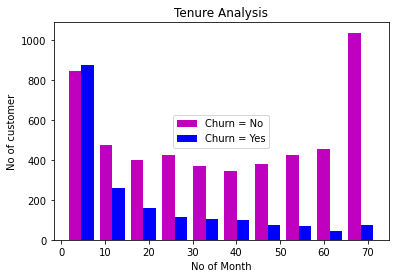

In [17]:
# To check histogram of Tenure Analysis
plt.hist([tenure_0, tenure_1], color = ['m', 'b'], label = ['Churn = No' ,'Churn = Yes'])
plt.xlabel('No of Month')
plt.ylabel('No of customer')
plt.legend(loc = 'center')
plt.title('Tenure Analysis')
plt.show()

In [18]:
MonthlyCharges_0 = df1[df1['Churn'] == 'No'].MonthlyCharges
MonthlyCharges_0

0        29.85
1        56.95
3        42.30
6        89.10
7        29.75
         ...  
7037     21.15
7038     84.80
7039    103.20
7040     29.60
7042    105.65
Name: MonthlyCharges, Length: 5163, dtype: float64

In [19]:
MonthlyCharges_1 =  df1[df1['Churn'] == 'Yes'].MonthlyCharges
MonthlyCharges_1

2        53.85
4        70.70
5        99.65
8       104.80
13      103.70
         ...  
7021     59.80
7026     44.20
7032     75.75
7034    102.95
7041     74.40
Name: MonthlyCharges, Length: 1869, dtype: float64

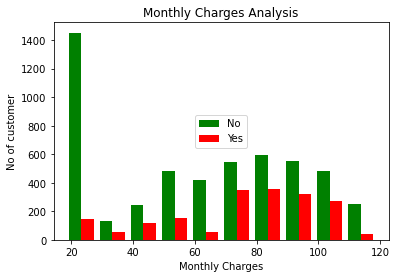

In [20]:
# To check histogram of Monthly Charges Analysis

plt.hist([MonthlyCharges_0 , MonthlyCharges_1], color = ['g', 'r'], label = ['No' , 'Yes'])
plt.xlabel('Monthly Charges')
plt.ylabel('No of customer')
plt.legend(loc = 'center')
plt.title('Monthly Charges Analysis')
plt.show()

In [21]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [22]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [23]:
# To check all unique values of dataset
for i in df1:
    print(i, " : ",df1[i].unique())

gender  :  ['Female' 'Male']
SeniorCitizen  :  [0 1]
Partner  :  ['Yes' 'No']
Dependents  :  ['No' 'Yes']
tenure  :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService  :  ['No' 'Yes']
MultipleLines  :  ['No phone service' 'No' 'Yes']
InternetService  :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  ['No' 'Yes' 'No internet service']
OnlineBackup  :  ['Yes' 'No' 'No internet service']
DeviceProtection  :  ['No' 'Yes' 'No internet service']
TechSupport  :  ['No' 'Yes' 'No internet service']
StreamingTV  :  ['No' 'Yes' 'No internet service']
StreamingMovies  :  ['No' 'Yes' 'No internet service']
Contract  :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  ['Yes' 'No']
PaymentMethod  :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges  :  [

In [24]:
# To replace the same meaning word 
df1.replace('No phone service', 'No', inplace = True)
df1.replace('No internet service', 'No', inplace = True)

In [25]:
# To check all unique values of dataset
for i in df1:
    print(i, " : ",df1[i].unique())

gender  :  ['Female' 'Male']
SeniorCitizen  :  [0 1]
Partner  :  ['Yes' 'No']
Dependents  :  ['No' 'Yes']
tenure  :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService  :  ['No' 'Yes']
MultipleLines  :  ['No' 'Yes']
InternetService  :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  ['No' 'Yes']
OnlineBackup  :  ['Yes' 'No']
DeviceProtection  :  ['No' 'Yes']
TechSupport  :  ['No' 'Yes']
StreamingTV  :  ['No' 'Yes']
StreamingMovies  :  ['No' 'Yes']
Contract  :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  ['Yes' 'No']
PaymentMethod  :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges  :  [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges  :  [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn  :  ['No' 'Yes']


In [26]:
# To replace the object in integer
df1.replace({'Yes': 1, 'No': 0, 'Female': 0, 'Male': 1}, inplace = True)

In [27]:
for i in df1:
    print(i, " : ",df1[i].unique())

gender  :  [0 1]
SeniorCitizen  :  [0 1]
Partner  :  [1 0]
Dependents  :  [0 1]
tenure  :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService  :  [0 1]
MultipleLines  :  [0 1]
InternetService  :  ['DSL' 'Fiber optic' 0]
OnlineSecurity  :  [0 1]
OnlineBackup  :  [1 0]
DeviceProtection  :  [0 1]
TechSupport  :  [0 1]
StreamingTV  :  [0 1]
StreamingMovies  :  [0 1]
Contract  :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]
PaymentMethod  :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges  :  [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges  :  [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn  :  [0 1]


In [28]:
# To convert the get dummies
final = pd.get_dummies(data = df1, drop_first = True)
final

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,1,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,1,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,84.80,1990.50,0,1,0,1,0,0,0,1
7039,0,0,1,1,72,1,1,0,1,1,...,103.20,7362.90,0,0,1,1,0,1,0,0
7040,0,0,1,1,11,0,0,1,0,0,...,29.60,346.45,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,0,0,0,...,74.40,306.60,1,0,1,0,0,0,0,1


In [29]:
# To drop the churn column in X
X = final.drop("Churn", axis = 1)
y = final.Churn

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler()

In [32]:
scaled = scaler.fit_transform(X)
scaled

array([[0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 1., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(scaled, y, test_size=0.20, random_state=42)

In [35]:
X_train.shape

(5625, 23)

In [36]:
X_test.shape

(1407, 23)

In [37]:
# This model is suitable for binary classification problems where the input data has 23 features.

model = keras.Sequential([
    keras.layers.Dense(1, input_shape = (23,), activation = 'sigmoid')
])
model.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
176/176 [==============================] - 2s 3ms/step - loss: 0.5738 - accuracy: 0.7227
Epoch 2/100
176/176 [==============================] - 1s 3ms/step - loss: 0.5175 - accuracy: 0.7406
Epoch 3/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4860 - accuracy: 0.7582
Epoch 4/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4668 - accuracy: 0.7764
Epoch 5/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4546 - accuracy: 0.7835
Epoch 6/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4464 - accuracy: 0.7881
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4406 - accuracy: 0.7920
Epoch 8/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4363 - accuracy: 0.7950
Epoch 9/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4331 - accuracy: 0.7959
Epoch 10/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4306 - accura

In [38]:
# This model is suitable for binary classification problems where the input data has 23 features.
# However, for more complex problems, you might need to add more layers and neurons to the model.
model = keras.Sequential([
    keras.layers.Dense(50, input_shape = (23,), activation = 'relu',kernel_initializer= 'ones', bias_initializer= 'zeros' ),
    keras.layers.Dense(1, activation = 'sigmoid')
    
])
model.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 25)

Epoch 1/25
176/176 [==============================] - 2s 3ms/step - loss: 0.6491 - accuracy: 0.7573
Epoch 2/25
176/176 [==============================] - 1s 3ms/step - loss: 0.4381 - accuracy: 0.7927
Epoch 3/25
176/176 [==============================] - 0s 3ms/step - loss: 0.4282 - accuracy: 0.7977
Epoch 4/25
176/176 [==============================] - 1s 3ms/step - loss: 0.4265 - accuracy: 0.7964
Epoch 5/25
176/176 [==============================] - 0s 3ms/step - loss: 0.4226 - accuracy: 0.8007
Epoch 6/25
176/176 [==============================] - 0s 3ms/step - loss: 0.4260 - accuracy: 0.7989
Epoch 7/25
176/176 [==============================] - 1s 3ms/step - loss: 0.4227 - accuracy: 0.8027
Epoch 8/25
176/176 [==============================] - 0s 3ms/step - loss: 0.4249 - accuracy: 0.7956
Epoch 9/25
176/176 [==============================] - 0s 3ms/step - loss: 0.4194 - accuracy: 0.8048
Epoch 10/25
176/176 [==============================] - 0s 3ms/step - loss: 0.4211 - accuracy: 0.8009

In [39]:
# To check score
model. evaluate(X_test, y_test) 

44/44 [==============================] - 1s 3ms/step - loss: 0.4356 - accuracy: 0.7939


[0.435578316450119, 0.7938876748085022]

In [40]:
predicted = model.predict(X_train)
predicted

176/176 [==============================] - 1s 2ms/step


array([[0.31638792],
       [0.32845765],
       [0.31592497],
       ...,
       [0.557072  ],
       [0.01810246],
       [0.5622636 ]], dtype=float32)

In [41]:
y_prediction = []
for i in predicted:
    if i < 0.5:
        y_prediction.append(0)
    else:
        y_prediction.append(1)

In [42]:
y_prediction

[0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,


In [43]:
cm = tf.math.confusion_matrix(labels = y_train, predictions = y_prediction)

<AxesSubplot:>

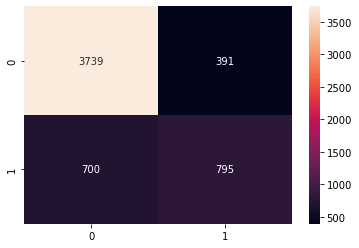

In [44]:
import seaborn as sns
sns.heatmap(cm, annot = True, fmt= 'd')

In [56]:
final['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [57]:
df0 = final[final['Churn'] == 0]
df0.shape

(5163, 24)

In [58]:
df1 = final[final['Churn'] == 1]
df1.shape

(1869, 24)

In [62]:
reduced = df0.sample(df0.shape[0])

In [61]:
low = pd.concat([reduced,df1])

In [63]:
X_low = low.drop("Churn", axis = 1)
y_low = low.Churn

In [64]:
X_low_train, X_low_test, y_low_train, y_low_test = train_test_split(X_low, y_low, test_size=0.20, random_state=42)

In [66]:
model.fit(X_low_train, y_low_train, epochs = 100)

Epoch 1/100
176/176 [==============================] - 0s 2ms/step - loss: 66.6072 - accuracy: 0.7314
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 7.6115 - accuracy: 0.6789
Epoch 3/100
176/176 [==============================] - 0s 3ms/step - loss: 4.4421 - accuracy: 0.7052
Epoch 4/100
176/176 [==============================] - 0s 3ms/step - loss: 2.2965 - accuracy: 0.7371
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 1.4183 - accuracy: 0.7648
Epoch 6/100
176/176 [==============================] - 0s 3ms/step - loss: 1.2075 - accuracy: 0.7696
Epoch 7/100
176/176 [==============================] - 0s 3ms/step - loss: 1.1461 - accuracy: 0.7636
Epoch 8/100
176/176 [==============================] - 0s 3ms/step - loss: 1.1398 - accuracy: 0.7689
Epoch 9/100
176/176 [==============================] - 1s 3ms/step - loss: 1.0382 - accuracy: 0.7740
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.9607 - accur

In [67]:
model.evaluate(X_low_test, y_low_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4440 - accuracy: 0.8173


[0.4440477192401886, 0.8173418641090393]

In [68]:
y_low_pred = model.predict(X_low_train)

176/176 [==============================] - 0s 2ms/step


In [69]:
y_low_predict = []
for i in y_low_pred:
    if i < 0.5:
        y_low_predict.append(0)
    else:
        y_low_predict.append(1)       

In [70]:
cf1 = tf.math.confusion_matrix(labels = y_low_train, predictions = y_low_predict)

<AxesSubplot:>

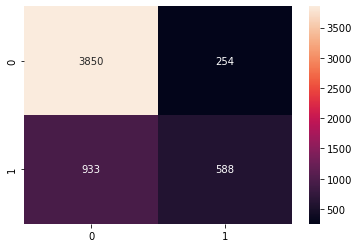

In [71]:
sns.heatmap(cf1 ,annot=True, fmt = 'd')

In [72]:
increased = df1.sample(df1.shape[0], replace = True)

In [73]:
high = pd.concat([increased,df0])

In [74]:
X_high = high.drop("Churn", axis = 1)
y_high = high.Churn

In [75]:
X_high_train, X_high_test, y_high_train, y_high_test = train_test_split(X_high, y_high, test_size=0.20, random_state=42)

In [76]:
model.fit(X_high_train, y_high_train, epochs = 100)

Epoch 1/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4439 - accuracy: 0.7916
Epoch 2/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4265 - accuracy: 0.7998
Epoch 3/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4340 - accuracy: 0.7945
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4564 - accuracy: 0.7911
Epoch 5/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4478 - accuracy: 0.7954
Epoch 6/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4383 - accuracy: 0.7932
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4390 - accuracy: 0.7936
Epoch 8/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4601 - accuracy: 0.7886
Epoch 9/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4339 - accuracy: 0.8011
Epoch 10/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4678 - accura

In [77]:
model.evaluate(X_high_test, y_high_test)

44/44 [==============================] - 0s 3ms/step - loss: 0.4230 - accuracy: 0.8060


[0.4229726791381836, 0.8059701323509216]

In [78]:
y_high_pred = model.predict(X_high_train)

176/176 [==============================] - 0s 2ms/step


In [79]:
y_high_predict = []
for i in y_high_pred:
    if i < 0.5:
        y_high_predict.append(0)
    else:
        y_high_predict.append(1)    

In [80]:
cf2 = tf.math.confusion_matrix(labels = y_high_train, predictions = y_high_predict)

<AxesSubplot:>

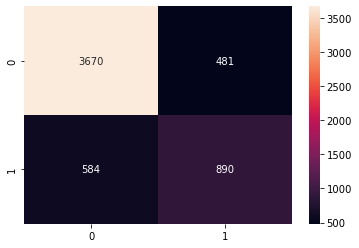

In [81]:
sns.heatmap(cf2 ,annot=True, fmt = 'd')